In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv(r'C:\Users\impor\Downloads\archive(4)\heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
df.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# How many categorical features and numerical features

numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])
print("No. numeric features is "+ str(len(numeric_features.columns))+ " and No. and categorial feature is " + str(len(categorical_features.columns)))

No. numeric features is 4 and No. and categorial feature is 14


# Disturbution (numerial varieable)

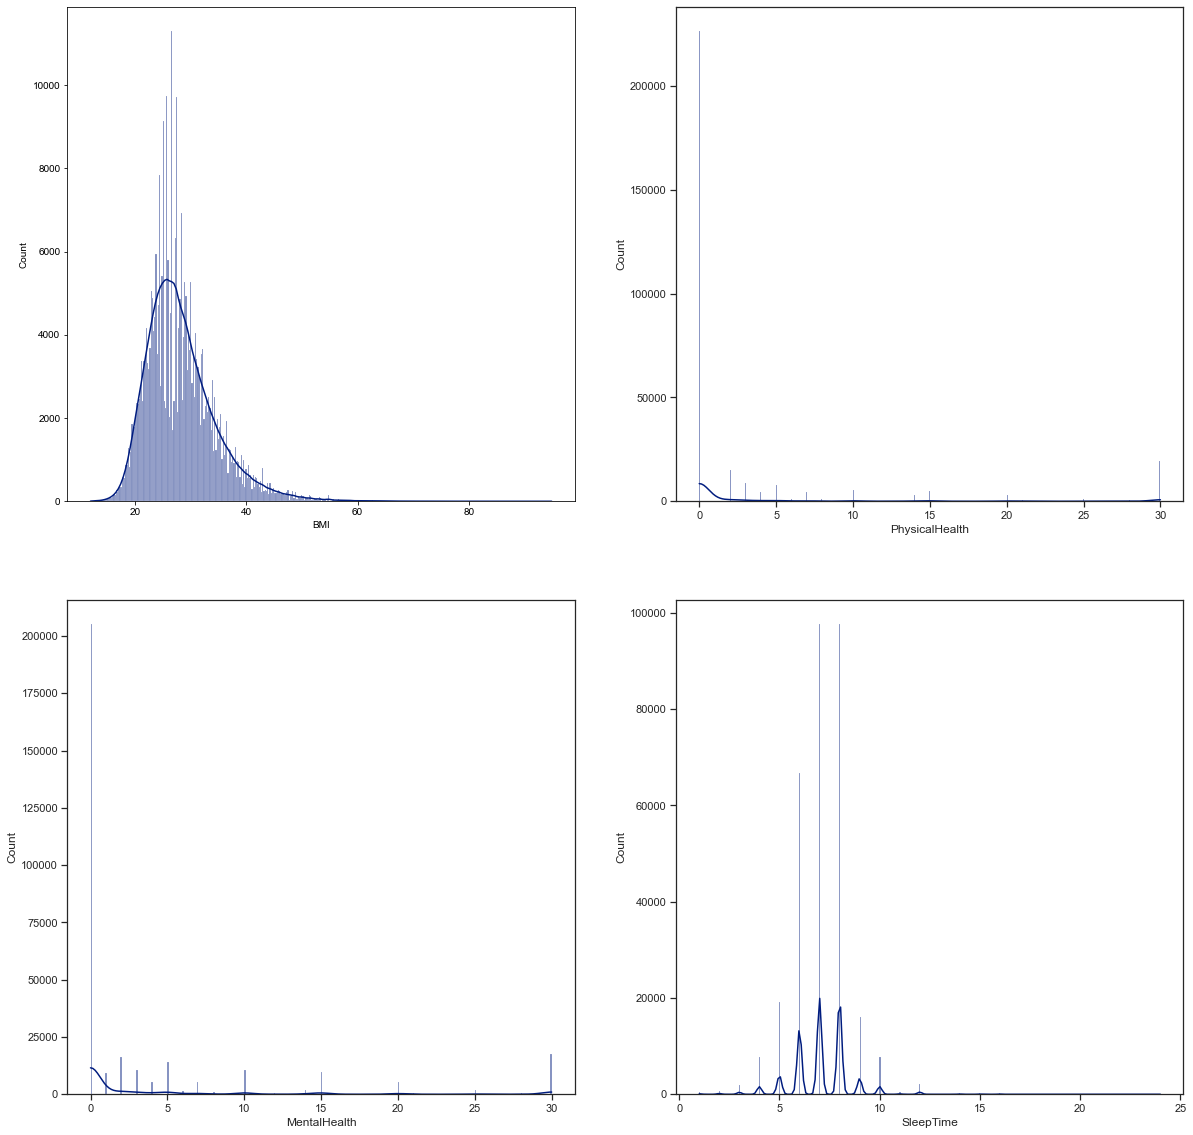

In [ ]:

i = 1
plt.figure(figsize = (20,20))
for feature in numeric_features:
    plt.subplot(2,2,i)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(df[feature],kde=True)
    i+=1


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


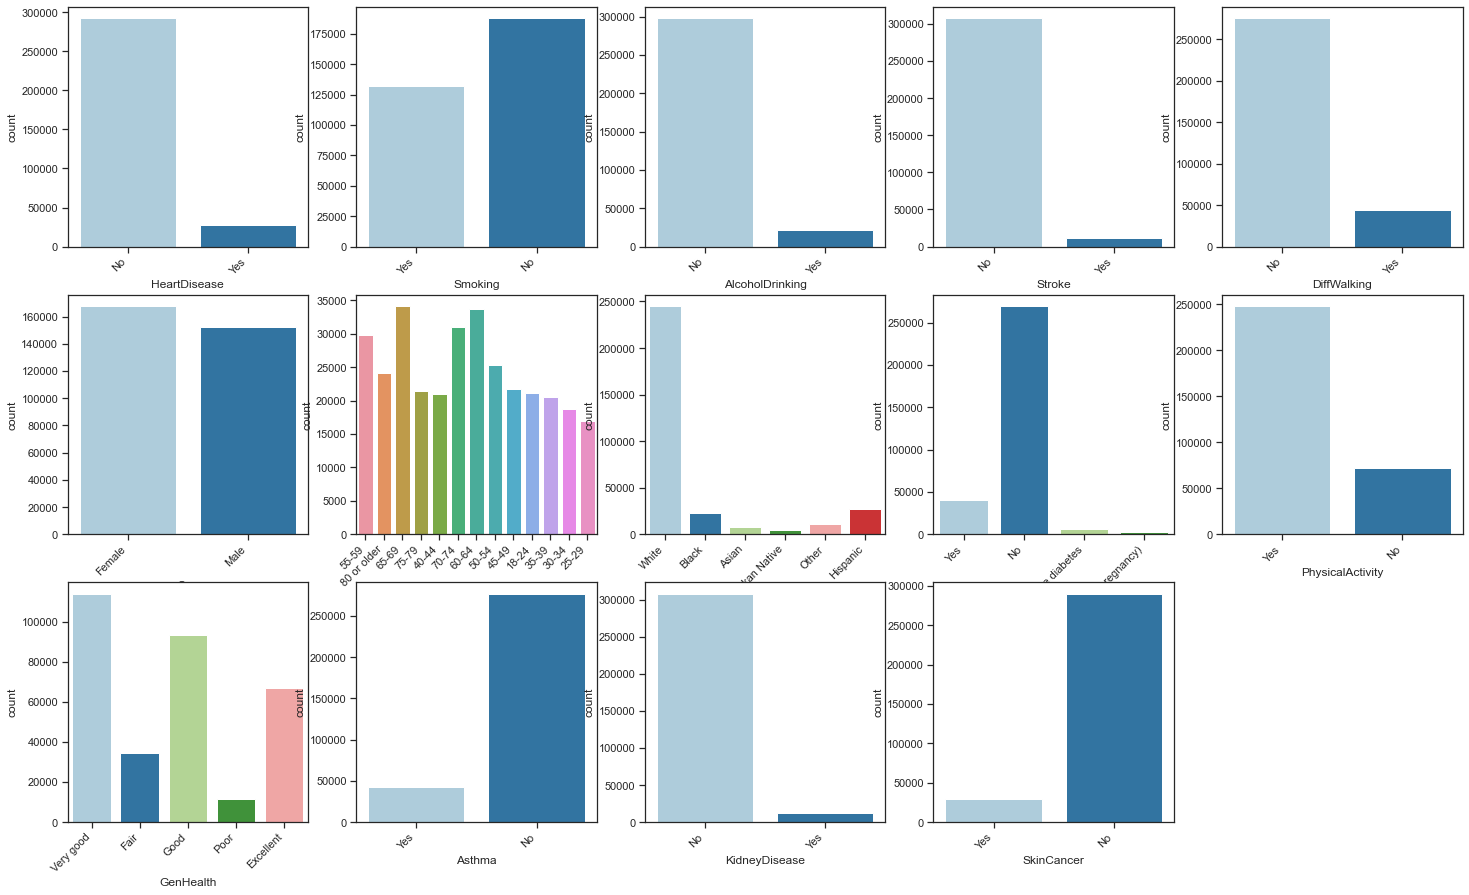

In [ ]:
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35') 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

In [ ]:
df.describe(include = "object")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


# EDA anlysis

Text(0.5, 1.0, 'How many people get heart dieases by percentage?')

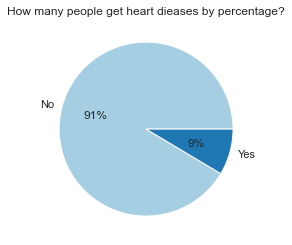

In [ ]:
heartdiesase = df["HeartDisease"].value_counts()
plt.pie(heartdiesase, labels=df["HeartDisease"].value_counts().index,autopct='%.0f%%')
plt.title("How many people get heart dieases by percentage?")

For those who have heart diesase,the disturbution by age, and gender

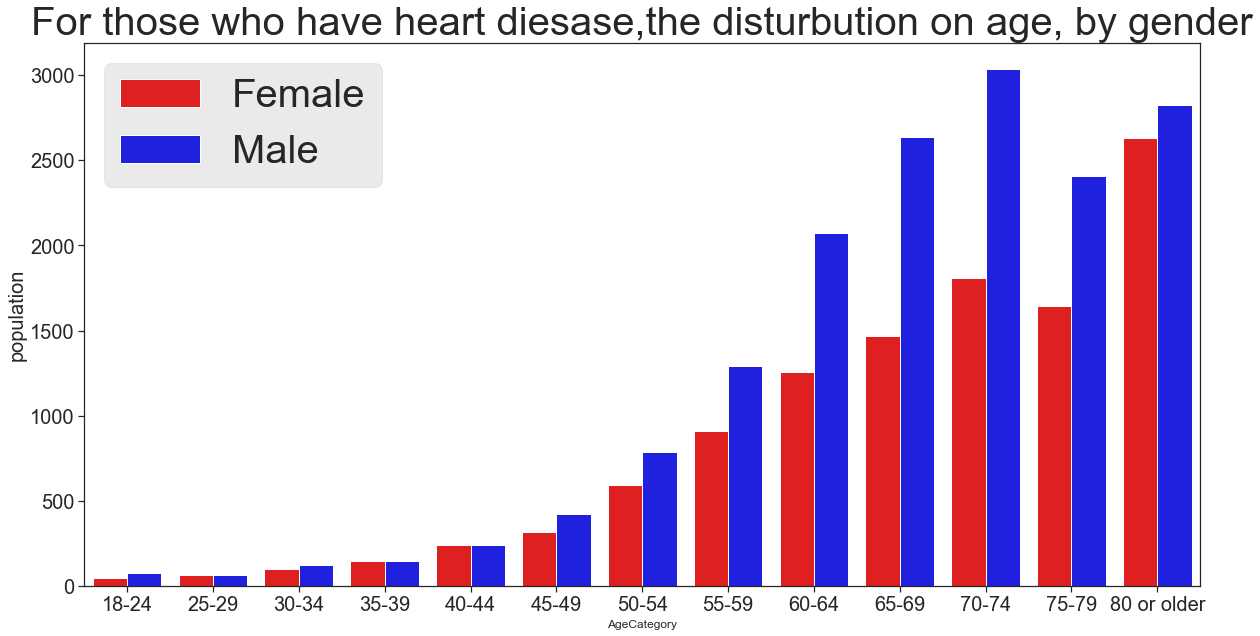

In [ ]:
plt.figure(figsize = (20,10))
haveHeartDiease = df[df["HeartDisease"]== "Yes"]
haveHeartDiease["AgeCategory"].value_counts()
colors = {"Male": "blue", "Female": "red"}
#plt.pie(haveHeartDiease["AgeCategory"].value_counts(), labels=haveHeartDiease["AgeCategory"].value_counts().index,autopct='%.0f%%')
sns.countplot(x = haveHeartDiease["AgeCategory"].sort_values() ,hue=haveHeartDiease["Sex"],palette=colors)
plt.style.use('ggplot')
plt.legend( fontsize=40)
plt.ylabel('population', fontsize=20);
plt.title('For those who have heart diesase,the disturbution on age, by gender', fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
#sum of the percentage Top 5 age group 
sum((haveHeartDiease["AgeCategory"].value_counts()/sum(haveHeartDiease["AgeCategory"].value_counts())*100)[:5])

79.54188433858181

In [ ]:
haveHeartDiease["AgeCategory"].value_counts()/sum(haveHeartDiease["AgeCategory"].value_counts())*100

80 or older    19.906477
70-74          17.707230
65-69          14.981916
75-79          14.791948
60-64          12.154313
55-59           8.044423
50-54           5.052424
45-49           2.718007
40-44           1.775472
35-39           1.081358
30-34           0.825631
25-29           0.485880
18-24           0.474921
Name: AgeCategory, dtype: float64

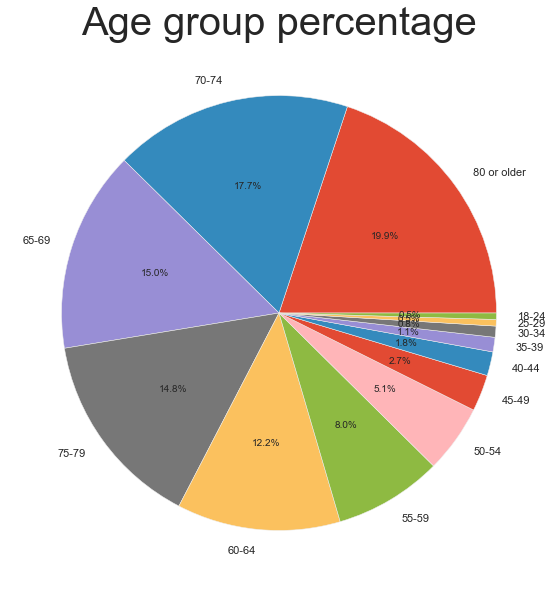

In [ ]:
plt.figure(figsize = (10,10))
data = haveHeartDiease["AgeCategory"].value_counts()/sum(haveHeartDiease["AgeCategory"].value_counts())*100
labels = data.index

plt.pie(data, labels=labels,  autopct="%1.1f%%")
#plt.legend(labels, loc="best")
plt.title('Age group percentage', fontsize=40)

plt.show()

Text(0.5, 1.0, 'Heart dieases by gender')

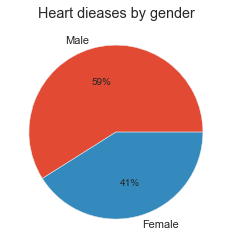

In [ ]:
plt.pie(haveHeartDiease["Sex"].value_counts(), labels=haveHeartDiease["Sex"].value_counts().index,autopct='%.0f%%')
plt.title("Heart dieases by gender")

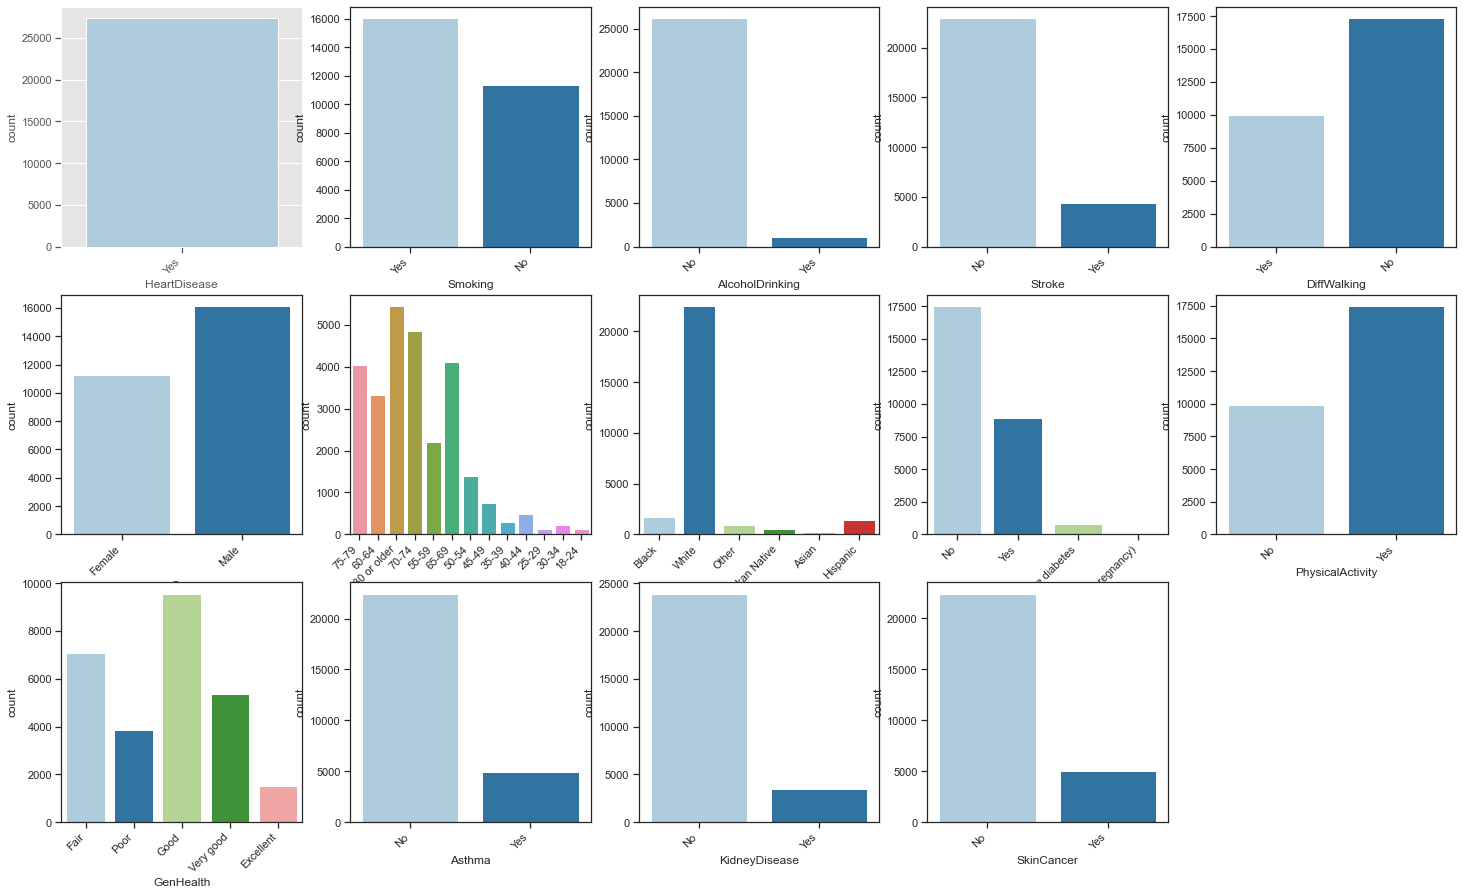

In [ ]:

plt.figure(figsize = (25,15))
plt.title("categorical variable with heart disease")
i = 1
for feature in categorical_features:
                          plt.subplot(3,5,i)
                          sns.set(palette='Paired')
                          sns.set_style("ticks")
                          ax = sns.countplot(x = feature, data = haveHeartDiease)#, hue = 'Stroke')#, color='#221C35') 
                          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
                          i +=1


In [ ]:
# difference percentage between heart disease and not heart disease

selected_feature = categorical_features[["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking", "Sex","PhysicalActivity","Asthma","KidneyDisease"]]
selected_feature


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease
0,No,Yes,No,No,No,Female,Yes,Yes,No
1,No,No,No,Yes,No,Female,Yes,No,No
2,No,Yes,No,No,No,Male,Yes,Yes,No
3,No,No,No,No,No,Female,No,No,No
4,No,No,No,No,Yes,Female,Yes,No,No
...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,No,Yes,No
319791,No,Yes,No,No,No,Male,Yes,Yes,No
319792,No,No,No,No,No,Female,Yes,No,No
319793,No,No,No,No,No,Female,No,No,No


In [ ]:
selected_feature.groupby(["HeartDisease"]).count()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease
HeartDisease,,,,,,,,
No,292422,292422,292422,292422,292422,292422,292422,292422
Yes,27373,27373,27373,27373,27373,27373,27373,27373


In [ ]:
df1 = (df.groupby(["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking", "Sex","PhysicalActivity","Asthma","KidneyDisease"])
         .apply(lambda x: (x['HeartDisease']== 'Yes').sum())
         .reset_index(name='count'))

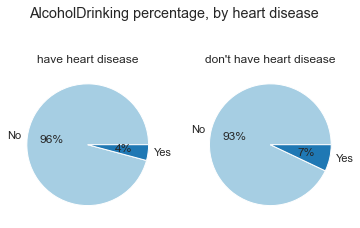

In [ ]:

res = pd.crosstab([df['AlcoholDrinking']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Alcohol Drinking percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

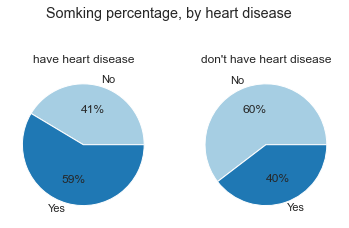

In [ ]:
res = pd.crosstab([df['Smoking']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Somking percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

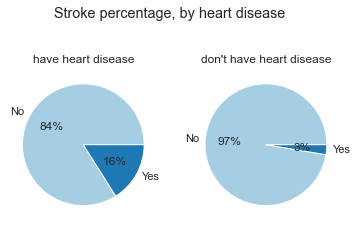

In [ ]:
res = pd.crosstab([df['Stroke']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Stroke percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

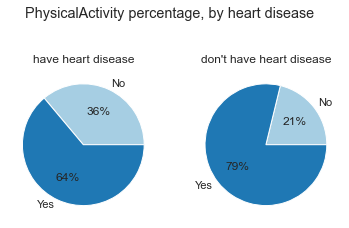

In [ ]:
res = pd.crosstab([df['PhysicalActivity']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PhysicalActivity percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

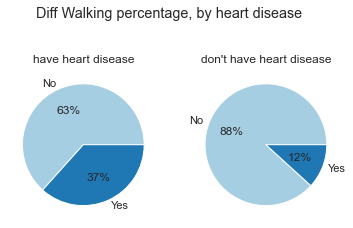

In [ ]:
res = pd.crosstab([df['DiffWalking']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Diff Walking percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

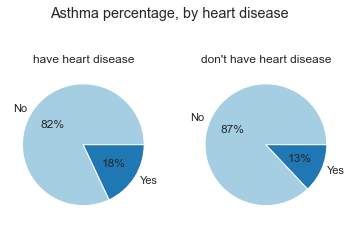

In [ ]:
res = pd.crosstab([df['Asthma']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Asthma percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

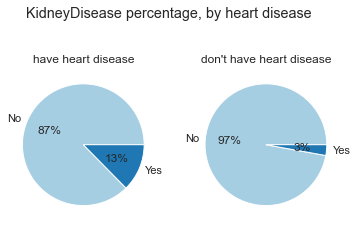

In [ ]:
res = pd.crosstab([df['KidneyDisease']],df['HeartDisease'])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('KidneyDisease percentage, by heart disease')
ax1.set_title('have heart disease')
ax1.pie(res["Yes"], labels=list(res["Yes"].index),autopct='%.0f%%')
ax2.set_title('don\'t have heart disease')
ax2.pie(res["No"], labels=list(res["No"].index),autopct='%.0f%%')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

c:\users\impor\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\impor\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\impor\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel den

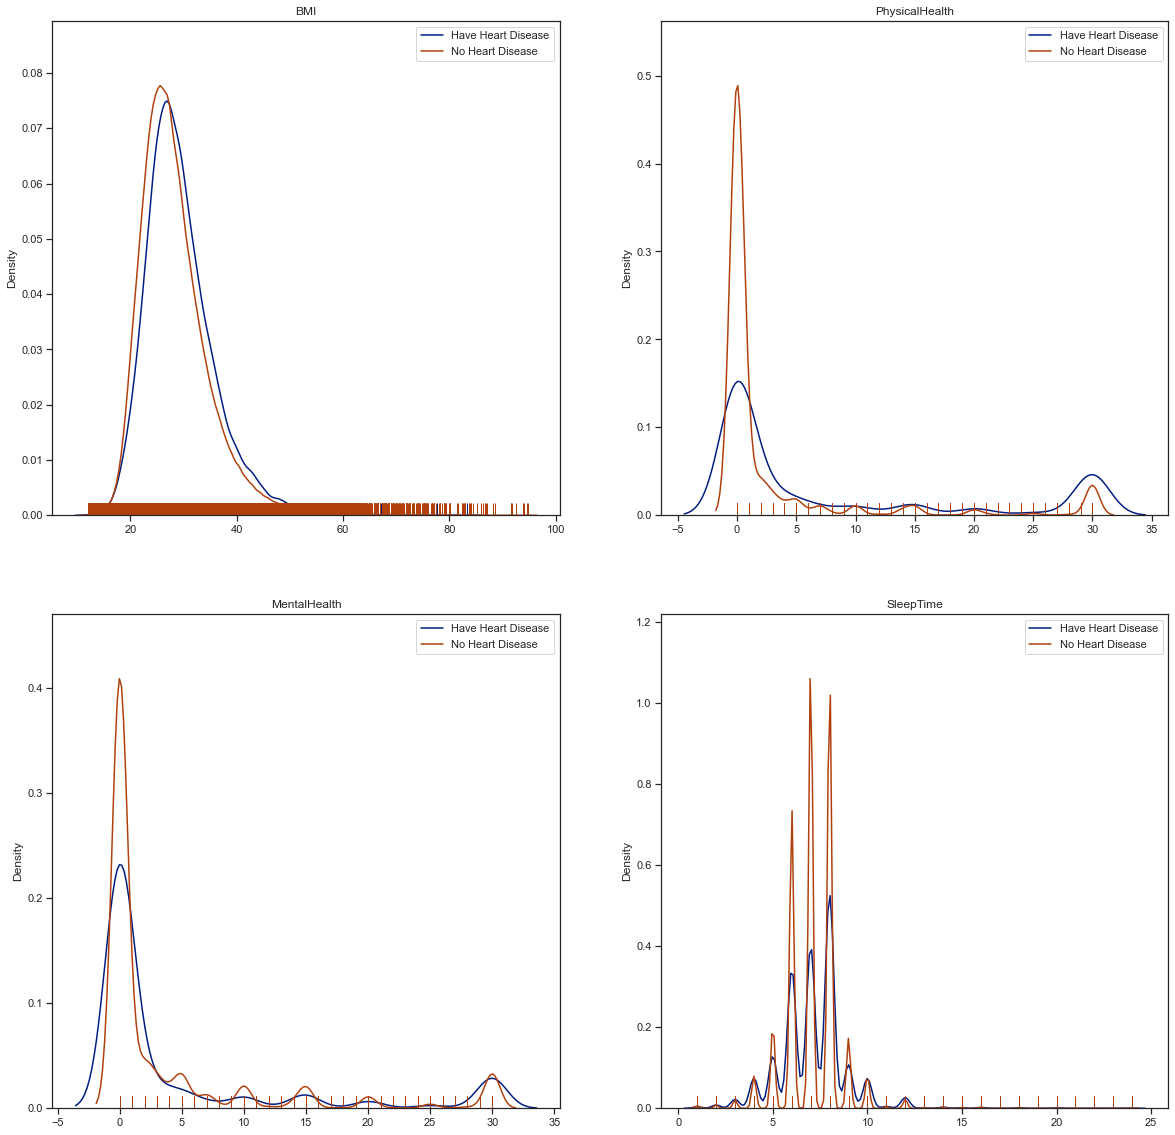

In [ ]:
i = 1
plt.figure(figsize = (20,20))
for feature in numeric_features:
    plt.subplot(2,2,i)
    
  
    target_1 = df.loc[df['HeartDisease'] == "Yes"]
    target_2 = df.loc[df['HeartDisease'] == "No"]

    plt.title(feature)
    sns.distplot(target_1[[feature]], hist=False, rug=True, label= "Have Heart Disease")
    sns.distplot(target_2[[feature]], hist=False, rug=True, label= "No Heart Disease")
    plt.legend()
    i+=1


# Machine learning part

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat = list(categorical_features.columns)
newdf = df[cat].apply(LabelEncoder().fit_transform)
df.update(newdf)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardise=StandardScaler()

#split x and y 

Y = list(df["HeartDisease"])
X = df.drop("HeartDisease", axis=1)

X = standardise.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape,X_test.shape

((223856, 17), (95939, 17))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sn

def train_model(model_name, params, X_train, y_train, X_test, y_test, ax_cm=None, ax_roc=None):
    if model_name == 'Decision Tree':
        model = DecisionTreeClassifier(**params)
    elif model_name == 'AdaBoost':
        model = AdaBoostClassifier(**params)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(**params)
    elif model_name == 'Naïve Bayes':
        model = GaussianNB(**params)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(**params)
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(**params)
    else:
        raise ValueError("Invalid model name. Please choose from Decision Tree, AdaBoost, Random Forest, Naïve Bayes, KNN, or Perceptron.")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    if ax_cm:
        sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap='Blues', ax=ax_cm, cbar=False)
        ax_cm.set_xlabel('Predicted', fontsize=16)
        ax_cm.set_ylabel('Truth', fontsize=16)
        ax_cm.set_title(f"{model_name} (Acc: {accuracy:.2f})", fontsize=18, pad=20)
    
    # Plot ROC curve
    if ax_roc and hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
        yes_probs = y_score[:, 1]
        fpr, tpr, _ = roc_curve(y_test, yes_probs)
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, marker='_', label=f'{model_name} (AUC = {roc_auc:.2f})')
        ax_roc.set_title(f"ROC Curve - {model_name}", fontsize=18, pad=20)

    
    print(f"Classification report <{model_name}>")
    print(report)
    
    return model



Classification report <Decision Tree>
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     87649
           1       0.23      0.25      0.24      8290

    accuracy                           0.86     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.86      0.87     95939

Classification report <AdaBoost>
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87649
           1       0.50      0.11      0.18      8290

    accuracy                           0.91     95939
   macro avg       0.71      0.55      0.57     95939
weighted avg       0.89      0.91      0.89     95939

Classification report <Random Forest>
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87649
           1       0.36      0.12      0.18      8290

    accuracy                           0.91     95939
   macro avg       

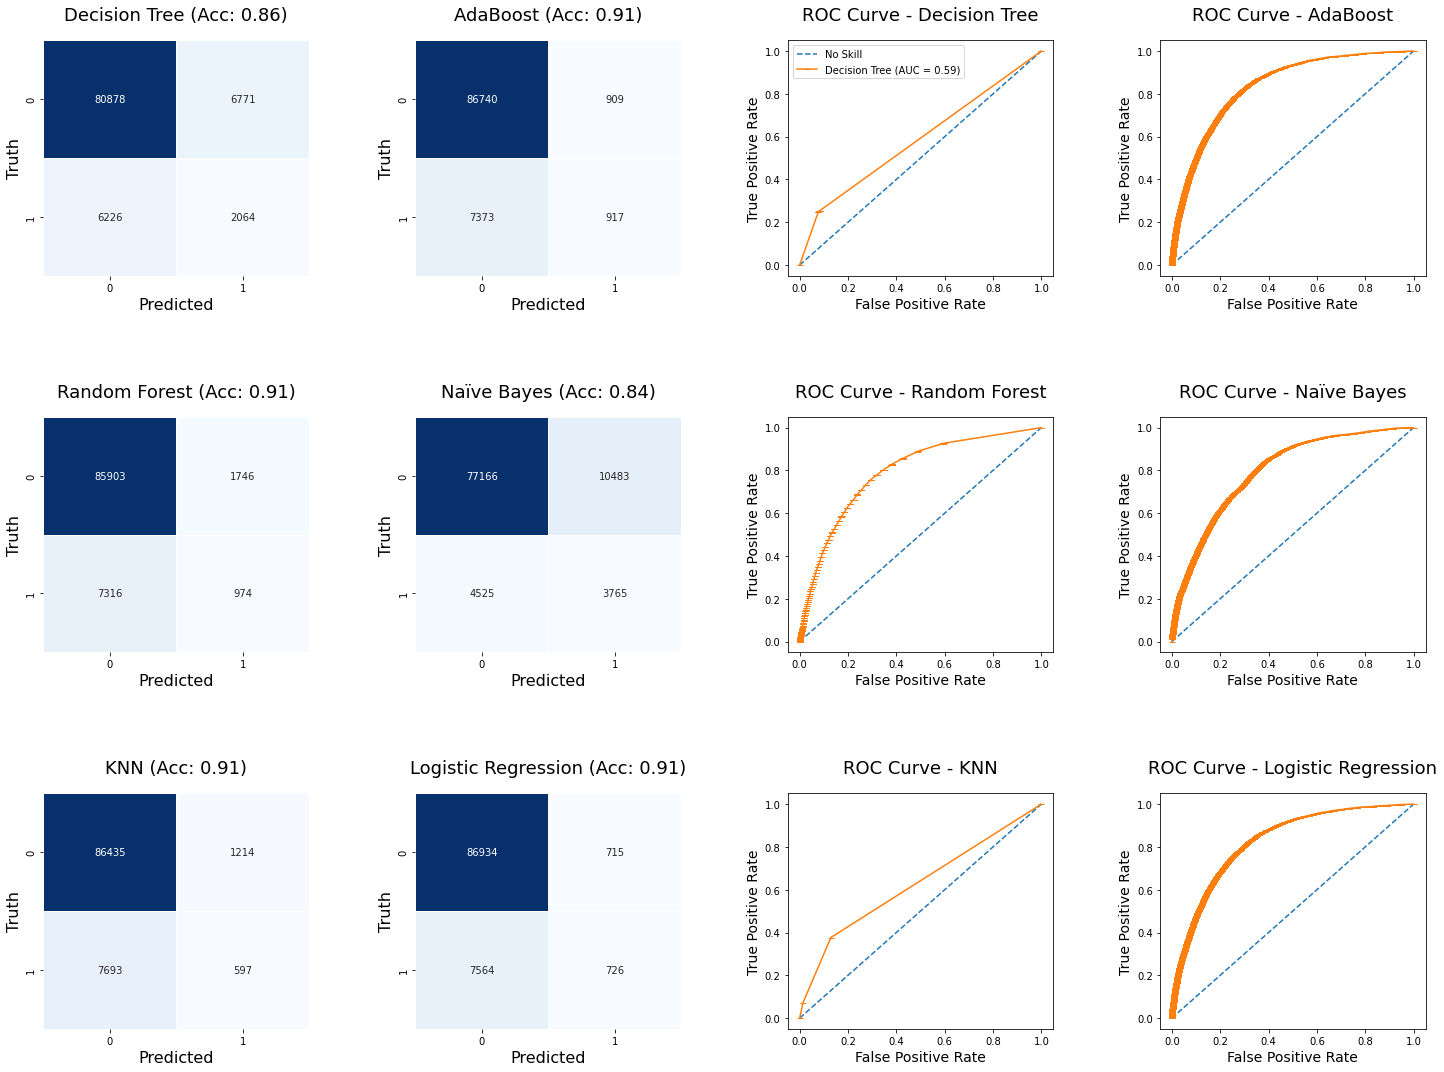

In [ ]:
models = [
    {'name': 'Decision Tree', 'params': {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}},
    {'name': 'AdaBoost', 'params': {'n_estimators': 50, 'learning_rate': 1}},
    {'name': 'Random Forest', 'params': {'criterion': 'entropy'}},
    {'name': 'Naïve Bayes', 'params': {'var_smoothing': 1e-9}},
    {'name': 'KNN', 'params': {'n_neighbors': 2}},
    {'name': 'Logistic Regression', 'params': {}}
]

# Plotting confusion matrices and ROC curves for all models in a 3x3 grid
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
cm_axes = axes[:, :2].ravel()
roc_axes = axes[:, 2:].ravel()

# Plot "No-Skill" on ROC Curve
for ax in roc_axes:
    ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    ax.set_xlabel("False Positive Rate", fontsize=14)
    ax.set_ylabel("True Positive Rate", fontsize=14)

for idx, model_info in enumerate(models):
    train_model(model_info['name'], model_info['params'], X_train, y_train, X_test, y_test, ax_cm=cm_axes[idx], ax_roc=roc_axes[idx])

# Set the legend for ROC curves
roc_axes[0].legend()

fig.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Add margins between subplots
plt.show()

